In [1]:
! pip install -q datasets
! pip install -q pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 25.3 MB/s eta 0:00:00


In [4]:
from datasets import load_dataset
import pandas as pd

In [2]:
dataset = load_dataset("gaussalgo/Canard_Wiki-augmented")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/31526 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5571 [00:00<?, ? examples/s]

In [5]:
df = pd.DataFrame(dataset["train"])

In [9]:
df.head()

,History,QuAC_dialog_id,Question,Question_no,Rewrite,true_page_title,true_contexts,answer,true_contexts_wiki,extractive,retrieved_contexts
0,"[Johnny Unitas, 1964 MVP season]",C_2ba58216460d43aa986fc0e897537239_0,what team did unitas play for,1,what team did Johnny Unitas play for?,Johnny Unitas,The 1964 season would see the Colts return to ...,The Colts,"John Constantine Unitas (; May 7, 1933 – Septe...",True,[The Gorinchemse Voetbalvereniging Unitas is a...
1,"[Johnny Unitas, 1964 MVP season, what team did...",C_2ba58216460d43aa986fc0e897537239_0,how many games did the colts win,2,how many games did the colts win,Johnny Unitas,The 1964 season would see the Colts return to ...,the Colts ran off 10 straight victories to fin...,"John Constantine Unitas (; May 7, 1933 – Septe...",False,[The 1991 Indianapolis Colts season was the 39...
2,"[Johnny Unitas, 1964 MVP season, what team did...",C_2ba58216460d43aa986fc0e897537239_0,who did they play in the playoffs,3,who did the Colts play in the playoffs?,Johnny Unitas,The 1964 season would see the Colts return to ...,Cleveland Browns,"John Constantine Unitas (; May 7, 1933 – Septe...",True,[The 2014 J.League Division 2 season was the 4...
3,"[Johnny Unitas, 1964 MVP season, what team did...",C_2ba58216460d43aa986fc0e897537239_0,did they win the super bowl,4,did the Colts win the super bowl?,Johnny Unitas,The 1964 season would see the Colts return to ...,losing 27-0.,"John Constantine Unitas (; May 7, 1933 – Septe...",False,[The Patriots–Steelers rivalry is a National F...
4,"[Johnny Unitas, 1964 MVP season, what team did...",C_2ba58216460d43aa986fc0e897537239_0,who did they play in the super bowl,5,who did the Colts play in the super bowl?,Johnny Unitas,The 1964 season would see the Colts return to ...,the Packers.,"John Constantine Unitas (; May 7, 1933 – Septe...",True,[The 2011 Pro Bowl was the National Football L...


<AxesSubplot:>

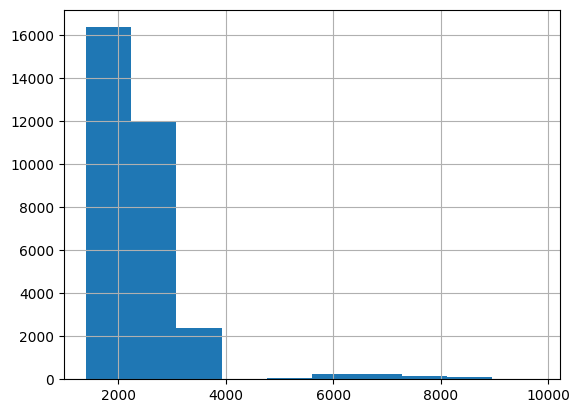

In [8]:
df["true_contexts"].str.len().hist()

In [ ]:
len(df[df["true_contexts"].str.len() < 400])

In [1]:
import wikipedia

# search for the page
results = wikipedia.search("Geographic coordinate system")

# get the page title
title = results[0]

# get the page content
page = wikipedia.page(title)

# print the page content
print(page.content)

The geographic coordinate system (GCS) is a spherical or geodetic coordinate system for measuring and communicating positions directly on the Earth as latitude and longitude. It is the simplest, oldest and most widely used of the various spatial reference systems that are in use, and forms the basis for most others. Although latitude and longitude form a coordinate tuple like a cartesian coordinate system, the geographic coordinate system is not cartesian because the measurements are angles and are not on a planar surface.A full GCS specification, such as those listed in the EPSG and ISO 19111 standards, also includes a choice of geodetic datum (including an Earth ellipsoid), as different datums will yield different latitude and longitude values for the same location.


== History ==

The invention of a geographic coordinate system is generally credited to Eratosthenes of Cyrene, who composed his now-lost Geography at the Library of Alexandria in the 3rd century BC. A century later, Hi

In [ ]:
# replace row with "title" = "New York" to "New York (state)"
df.loc[df["title"] == "New York", "title"] = "New York (state)"

In [ ]:
import pandas as pd
from datasets import Dataset

# create a dictionary
my_dict = {"title1": "context1", "title2": "context2"}

# convert dictionary to dataframe
df = pd.DataFrame(list(my_dict.items()), columns=["title", "context"])

# convert dataframe to dataset
my_dataset = Dataset.from_pandas(df)


# convert dataset to dataframe
df = my_dataset.to_pandas()

# convert dataframe to dictionary
my_dict = df.set_index("title")["context"].to_dict()